In [ ]:
import torch

# torch.empty(size): uninitiallized
x = torch.empty(3) # scalar
print("empty(1):", x)
x = torch.empty(3) + x # vector
print("empty(3):",x)
x = torch.empty(2, 3) # matrix
print("empty(2,3):",x)
x = torch.empty(2, 2, 3) # tensor, 3 dimensions
#x = torch.empty(2,2,2,3) # tensor, 4 dimensions
print("empty(2, 2, 3):",x)

# torch.rand(size): random numbers [0, 1]
x = torch.rand(5, 3)
print("rand(5,3):", x)

# torch.zeros(size), fill with 0
# torch.ones(size), fill with 1
x = torch.zeros(5, 3)
print("zeros(5,3):", x)

empty(1): tensor([2.3204e+33, 4.3655e-41, 2.3205e+33])
empty(3): tensor([2.3204e+33, 4.3655e-41, 1.1028e+38])
empty(2,3): tensor([[1.1028e+38, 4.3656e-41, 3.6500e-34],
        [0.0000e+00, 4.4842e-44, 0.0000e+00]])
empty(2, 2, 3): tensor([[[3.6809e-34, 0.0000e+00, 3.6807e-34],
         [0.0000e+00, 1.4153e-43, 1.4013e-45]],

        [[0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 1.2612e-44, 1.2612e-44]]])
rand(5,3): tensor([[0.8490, 0.3350, 0.8129],
        [0.4674, 0.2717, 0.5539],
        [0.3915, 0.6761, 0.6213],
        [0.7065, 0.7730, 0.1077],
        [0.6927, 0.7633, 0.3437]])
zeros(5,3): tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [ ]:
a = torch.tensor([1, 2, 3])
print("a =", a)          # Тензор с целочисленными значениями
print("a.dtype =", a.dtype)  # Например, torch.int64

# Использование torch.Tensor
b = torch.Tensor([1, 2, 3])
print("b =", b)          # Тензор с числами с плавающей точкой
print("b.dtype =", b.dtype)

a = tensor([1, 2, 3])
a.dtype = torch.int64
b = tensor([1., 2., 3.])
b.dtype = torch.float32


In [ ]:
# check size
print("size", x.size())  # x.size(0)
print("shape", x.shape)  # x.shape[0]

size torch.Size([5, 3])
shape torch.Size([5, 3])


In [ ]:
# check data type
print(x.dtype)

# specify types, float32 default
x = torch.zeros(5, 3, dtype=torch.float16)
print(x)

# check type
print(x.dtype)

torch.float32
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float16)
torch.float16


In [ ]:
x = torch.tensor([5.5, 3], requires_grad=True)
print(x)

tensor([5.5000, 3.0000], requires_grad=True)


In [ ]:

# Operations
x = torch.ones(2, 2)
y = torch.rand(2, 2)

# elementwise addition
z = x + y
# torch.add(x,y)

# in place addition, everythin with a trailing underscore is an inplace operation
# i.e. it will modify the variable
# y.add_(x)

print(x)
print(y)
print(z)

tensor([[1., 1.],
        [1., 1.]])
tensor([[0.0552, 0.1982],
        [0.5830, 0.9742]])
tensor([[1.0552, 1.1982],
        [1.5830, 1.9742]])


In [ ]:
z = x - y
z = torch.sub(x, y)

# multiplication
z = x * y
z = torch.mul(x,y)
print(z)

# division
z = x / y
z = torch.div(x,y)

tensor([[0.0552, 0.1982],
        [0.5830, 0.9742]])


In [ ]:
z = x @ y
print(z)

tensor([[0.6382, 1.1724],
        [0.6382, 1.1724]])


In [ ]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
# if -1 it pytorch will automatically determine the necessary size
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

x = torch.rand(2,2).to(device)  # move tensors to GPU device
#x = x.to("cpu")
#x = x.to("cuda")

x = torch.rand(2,2, device=device)  # or directy create them on GPU

In [ ]:
import torch

# requires_grad = True -> tracks all operations on the tensor.
x = torch.randn(3, requires_grad=True)
y = x + 2

# y was created as a result of an operation, so it has a grad_fn attribute.
# grad_fn: references a Function that has created the Tensor
print(x) # created by the user -> grad_fn is None
print(y)
print(y.grad_fn)

tensor([ 1.2271, -0.9789, -0.9092], requires_grad=True)
tensor([3.2271, 1.0211, 1.0908], grad_fn=<AddBackward0>)


In [ ]:
z = y * y * 3
print(z)
z = z.mean()
print(z)

tensor([31.2434,  3.1279,  3.5697], grad_fn=<MulBackward0>)
tensor(12.6470, grad_fn=<MeanBackward0>)


In [ ]:
print(x.grad)
z.backward()
print(x.grad) # dz/dx

None
tensor([6.4543, 2.0422, 2.1817])


In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Определяем устройство (GPU, если доступно)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Используем устройство:", device)

Используем устройство: cuda


In [ ]:
#  Преобразования: преобразуем изображение в тензор и нормализуем (среднее и std для MNIST)
transform = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Normalize((0.1307,), (0.3081,)) #добавить нормализацию
])

In [ ]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset  = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

batch_size = 64
train_loader = DataLoader(train_dataset,batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
train_dataset[0][0].shape

torch.Size([1, 28, 28])

In [ ]:
for batch in train_loader:
  print(batch[0].shape)

torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 2

In [ ]:
# Определяем простую MLP модель для классификации MNIST
class MLP(nn.Module):
    def __init__(self):
      super(MLP, self).__init__()
      self.flat = nn.Flatten()
      self.fc1 = nn.Linear(28*28, 3)
      self.tanh = nn.Tanh()
      self.fc2 = nn.Linear(3, 10)
        # TODO: нужно сделать два полносвязных слоя

    def forward(self, x):
        # TODO: форвад сделать
        x = self.fc1(self.flat(x))
        x = self.fc2(self.tanh(x))
        return x


model = MLP().to(device)          #перенсти на гпу
print(model)


MLP(
  (flat): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=3, bias=True)
  (tanh): Tanh()
  (fc2): Linear(in_features=3, out_features=10, bias=True)
)


In [ ]:
for i in model.parameters():
  print(i.shape)
  break

torch.Size([2, 784])


In [ ]:
# Определяем функцию потерь и оптимизатор
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:

# Обучающий цикл
num_epochs = 5
train_losses = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
      inputs, targets = inputs.to(device), targets.to(device)

      optimizer.zero_grad()

      outputs = model(inputs)
      loss = criterion(outputs, targets)
      loss.backward()

      optimizer.step()

      running_loss += loss.item()


    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")



Epoch 1/5, Loss: 1.5224
Epoch 2/5, Loss: 1.0984
Epoch 3/5, Loss: 0.9748
Epoch 4/5, Loss: 0.9158
Epoch 5/5, Loss: 0.8799


Test Accuracy: 69.88%


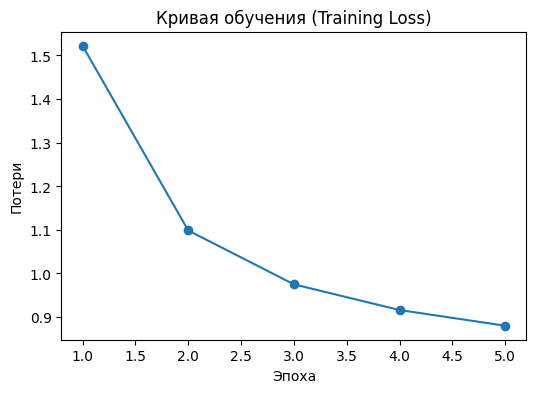

In [ ]:
# Оценка точности на тестовой выборке
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, dim=1)
        total += targets.size(0)
        correct += (predicted==targets).sum().item()



print(f"Test Accuracy: {100 * correct / total:.2f}%")

# Визуализируем кривую обучения
plt.figure(figsize=(6,4))
plt.plot(range(1, num_epochs+1), train_losses, marker='o')
plt.xlabel("Эпоха")
plt.ylabel("Потери")
plt.title("Кривая обучения (Training Loss)")
plt.show()


Confusion Matrix:
[[ 898    1    2    2    4   34   27    1   11    0]
 [   0 1080    7    7    0    1    7   13   19    1]
 [  22   74  249  109    6    5  535    5   25    2]
 [   4   20   70  732   29   39   25   58   21   12]
 [  14    1    6    6  717   34    3    7   28  166]
 [ 174    3   15   48  246  293   31    7   50   25]
 [ 123    3   38   14    4   12  754    0   10    0]
 [   0   25    3   27   13    1    1  682    8  268]
 [ 103   44   10   10   13   22   15   10  707   40]
 [  10    1    0    4   43    8    0   42   25  876]]


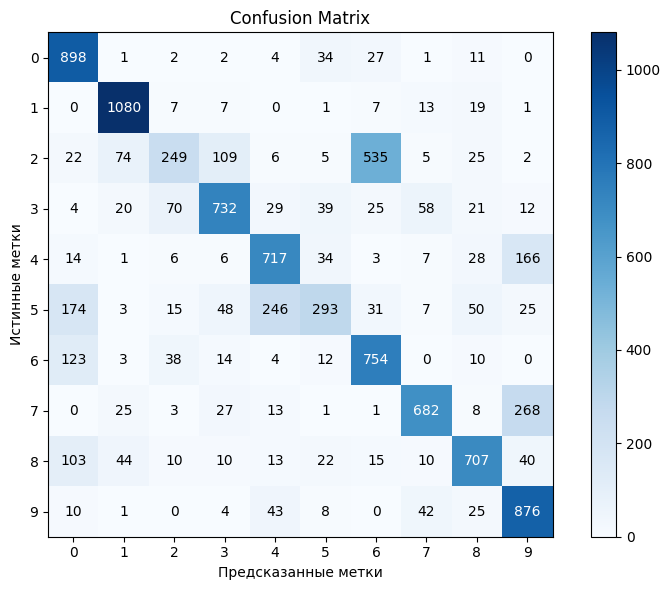

In [ ]:

import numpy as np
from sklearn.metrics import confusion_matrix

# Сбор всех предсказаний и истинных меток на тестовом наборе
all_preds = []
all_targets = []
with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, dim=1)
        all_preds.extend(predicted.cpu().numpy())
        all_targets.extend(targets.cpu().numpy())

# Вычисляем матрицу ошибок
cm = confusion_matrix(all_targets, all_preds)
print("Confusion Matrix:")
print(cm)

# Визуализация confusion matrix с помощью matplotlib
plt.figure(figsize=(8,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.xlabel("Предсказанные метки")
plt.ylabel("Истинные метки")
plt.tight_layout()

# Добавляем числовые значения для каждой ячейки
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.show()


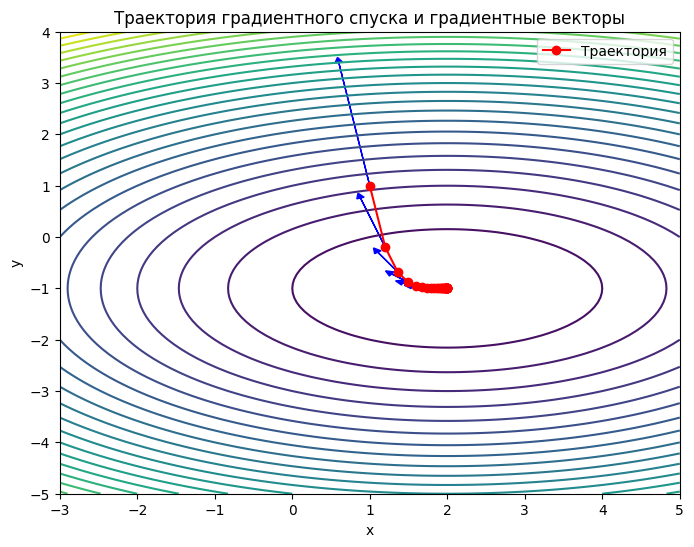

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Определим простую функцию двух переменных:
# f(x, y) = (x - 2)^2 + 3*(y + 1)^2
def f(params):
    x, y = params[0], params[1]
    return (x - 2)**2 + 3*(y + 1)**2

# Инициализируем параметры (начальное приближение)
params = torch.tensor([1.0,  1.0], requires_grad=True)

# Параметры оптимизации
lr = 0.1
num_iters = 30

# Списки для сохранения траектории параметров и градиентов
trajectory = []
gradients = []

for i in range(num_iters):
    # Вычисляем значение функции
    value = f(params)
    # Выполняем обратное распространение для вычисления градиента
    value.backward()

    # Сохраняем текущее значение параметров и градиент
    trajectory.append(params.detach().numpy().copy())
    gradients.append(params.grad.detach().numpy().copy())

    # Обновляем параметры с помощью градиентного спуска
    with torch.no_grad():
        params -= lr * params.grad
    # Обнуляем градиент
    params.grad.zero_()

trajectory = np.array(trajectory)
gradients = np.array(gradients)

# Построение контурного графика функции
x_vals = np.linspace(-3, 5, 100)
y_vals = np.linspace(-5, 4, 100)
X_grid, Y_grid = np.meshgrid(x_vals, y_vals)
Z = (X_grid - 2)**2 + 3*(Y_grid + 1)**2

plt.figure(figsize=(8, 6))
plt.contour(X_grid, Y_grid, Z, levels=30, cmap='viridis')
plt.plot(trajectory[:, 0], trajectory[:, 1], marker='o', color='red', label="Траектория")
# Отображаем градиентные векторы
for i in range(len(trajectory)):
    # Масштабируем стрелки для лучшей наглядности (коэффициент 0.2)
    plt.arrow(trajectory[i, 0], trajectory[i, 1], gradients[i, 0]*0.2, gradients[i, 1]*0.2,
              head_width=0.1, head_length=0.1, fc='blue', ec='blue')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Траектория градиентного спуска и градиентные векторы")
plt.legend()
plt.show()


Обучаем LinearMLP (без активаций)...
Epoch 40/500, Loss: 0.6926
Epoch 80/500, Loss: 0.6921
Epoch 120/500, Loss: 0.6921
Epoch 160/500, Loss: 0.6921
Epoch 200/500, Loss: 0.6921
Epoch 240/500, Loss: 0.6921
Epoch 280/500, Loss: 0.6921
Epoch 320/500, Loss: 0.6921
Epoch 360/500, Loss: 0.6921
Epoch 400/500, Loss: 0.6921
Epoch 440/500, Loss: 0.6921
Epoch 480/500, Loss: 0.6921
LinearMLP Test Accuracy: 31.00%

Обучаем NonlinearMLP (с активациями)...
Epoch 40/500, Loss: 0.6740
Epoch 80/500, Loss: 0.6416
Epoch 120/500, Loss: 0.6082
Epoch 160/500, Loss: 0.5553
Epoch 200/500, Loss: 0.5051
Epoch 240/500, Loss: 0.4712
Epoch 280/500, Loss: 0.4350
Epoch 320/500, Loss: 0.3991
Epoch 360/500, Loss: 0.3356
Epoch 400/500, Loss: 0.2856
Epoch 440/500, Loss: 0.2403
Epoch 480/500, Loss: 0.2270
NonlinearMLP Test Accuracy: 95.00%
Визуализация промежуточных представлений для LinearMLP (без активаций):


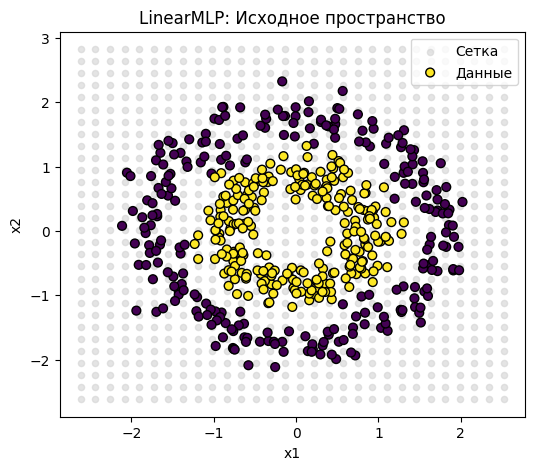

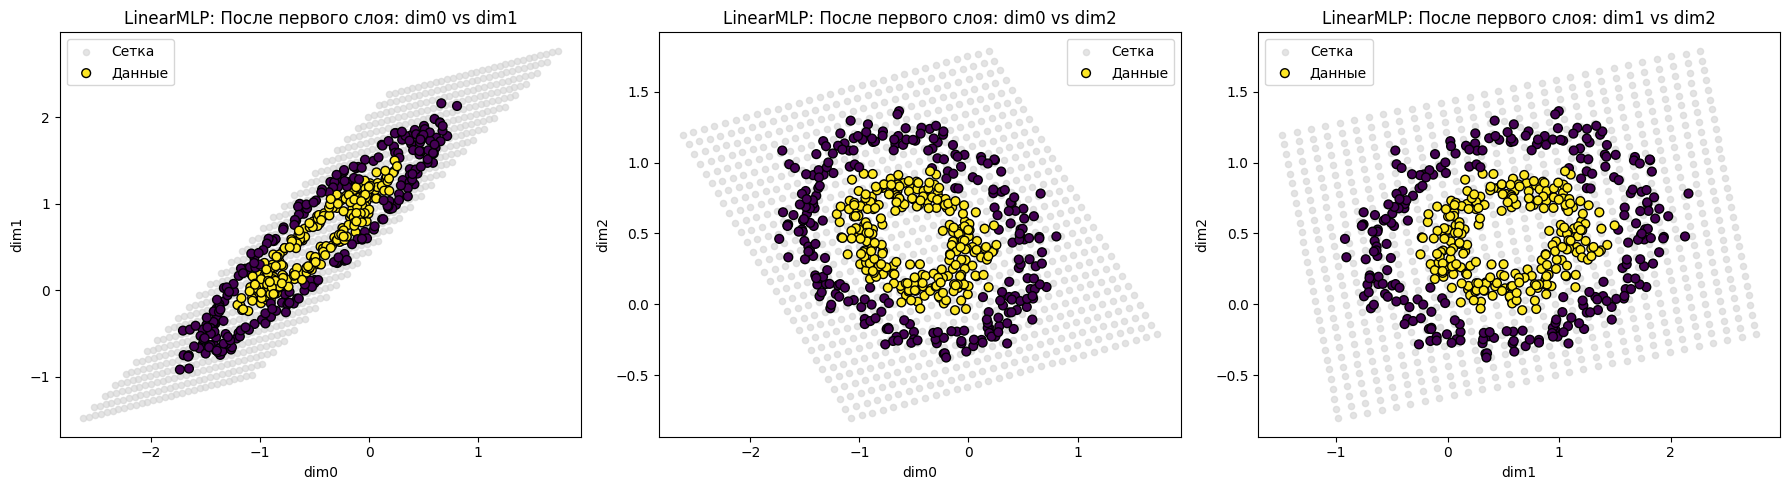

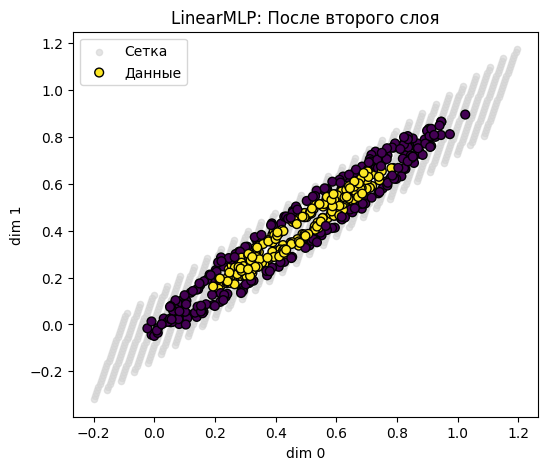

Визуализация промежуточных представлений для NonlinearMLP (с активациями):


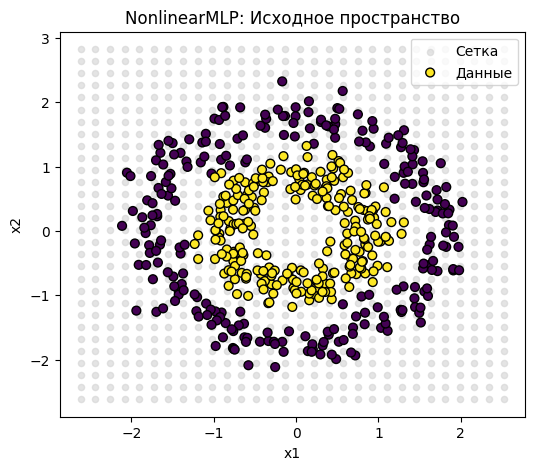

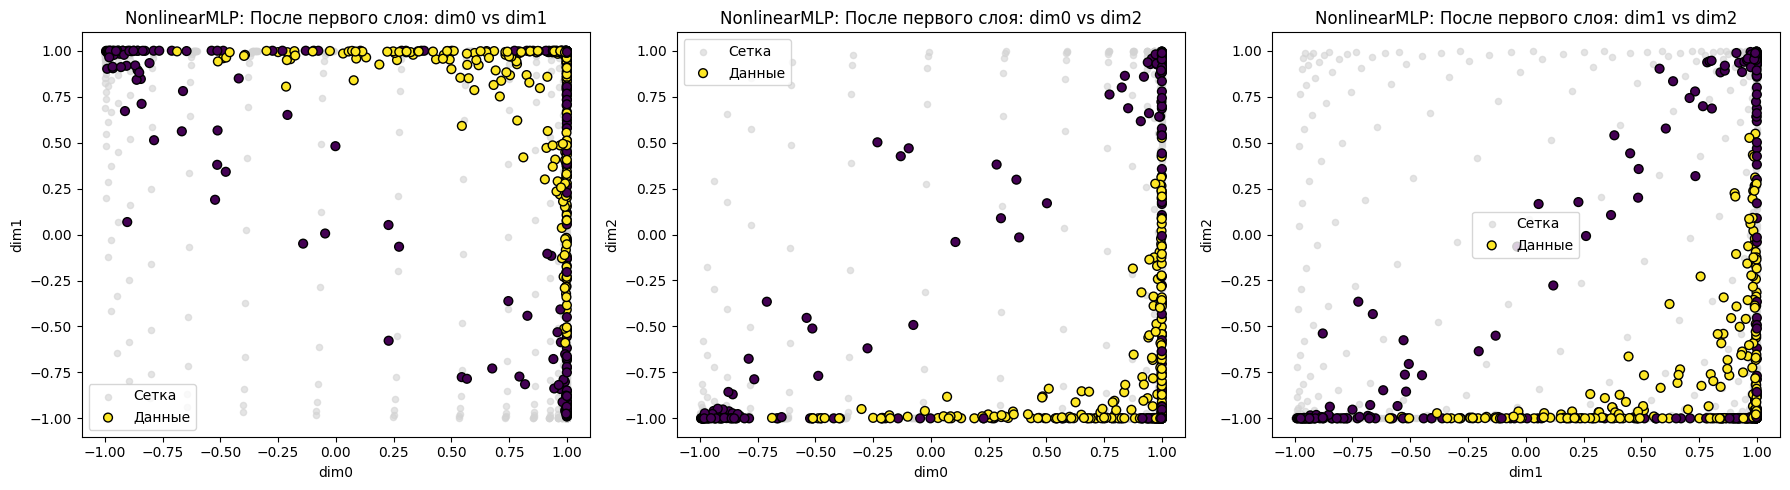

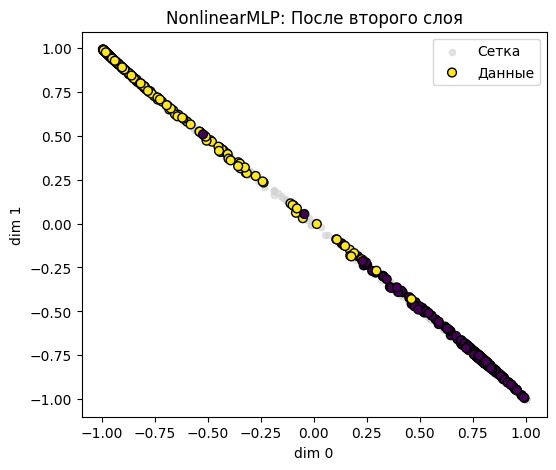

In [ ]:
# %% [markdown]
"""
# Сравнение MLP без активаций и с активациями с визуализацией промежуточных представлений

В этом примере:
- Генерируется датасет `make_circles` (один класс – внутренняя окружность, другой – внешняя).
- Определяются две модели:
  1. **LinearMLP** – модель без активационных функций (только линейные слои).
  2. **NonlinearMLP** – модель с нелинейными активациями (Tanh после каждого слоя).
- Обе модели обучаются для классификации.
- Замеряется точность на тестовой выборке.
- Затем для каждой модели визуализируются промежуточные представления:
    - Исходное пространство.
    - Выход первого слоя (out1). Если размерность равна 2 — 2D‑визуализация, если 3 — попарные 2D‑проекции.
    - Выход второго слоя (out2), который всегда 2D.

Таким образом, видно, что благодаря нелинейным активациям пространство «изгибается» для решения сложных задач.
"""

# %% [code]
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Для воспроизводимости
torch.manual_seed(42)
np.random.seed(42)

# %% [markdown]
"""
## Генерация и подготовка данных

Генерируем датасет `make_circles`:
- 500 точек, noise=0.1, factor=0.5 (внутренняя окружность составляет 50% от внешней).
Нормализуем данные и разобьём их на обучающую и тестовую выборки.
"""

# %% [code]
X, y = make_circles(n_samples=500, noise=0.1, factor=0.5, random_state=42)
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Преобразуем в тензоры PyTorch
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.LongTensor(y_test)

# %% [markdown]
"""
## Создание фоновой сетки для визуализации

Создадим равномерную сетку точек, которая покрывает область данных.
"""

# %% [code]
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 30),
                     np.linspace(y_min, y_max, 30))
grid = np.c_[xx.ravel(), yy.ravel()]
grid_tensor = torch.FloatTensor(grid)

# %% [markdown]
"""
## Определение моделей

Мы определяем две модели.

### 1. LinearMLP (без активаций)
Модель состоит из двух линейных слоёв:
- out1 = fc1(x)
- out2 = fc2(out1)

### 2. NonlinearMLP (с активациями)
Та же архитектура, но после каждого линейного слоя применяется Tanh:
- out1 = Tanh(fc1(x))
- out2 = Tanh(fc2(out1))

Обратите внимание, что мы добавляем параметр hidden_dim для первого слоя, чтобы можно было задавать число нейронов (например, 2 или 3).
"""

# %% [code]
# Модель без активаций
class LinearMLP(nn.Module):
    def __init__(self, hidden_dim=2):
        super(LinearMLP, self).__init__()
        self.fc1 = nn.Linear(2, hidden_dim)   # Промежуточное представление
        self.fc2 = nn.Linear(hidden_dim, 2)     # Выход для двух классов

    def forward(self, x):
        out1 = self.fc1(x)
        out2 = self.fc2(out1)
        return out1, out2

# Модель с активациями
class NonlinearMLP(nn.Module):
    def __init__(self, hidden_dim=2):
        super(NonlinearMLP, self).__init__()
        self.fc1 = nn.Linear(2, hidden_dim)
        self.tanh1 = nn.Tanh()
        self.fc2 = nn.Linear(hidden_dim, 2)
        self.tanh2 = nn.Tanh()

    def forward(self, x):
        out1 = self.tanh1(self.fc1(x))
        out2 = self.tanh2(self.fc2(out1))
        return out1, out2

def create_linear_model(hidden_dim=2):
    return LinearMLP(hidden_dim=hidden_dim)

def create_nonlinear_model(hidden_dim=2):
    return NonlinearMLP(hidden_dim=hidden_dim)

# %% [markdown]
"""
## Функция обучения модели

Обучаем модель для классификации с CrossEntropyLoss и оптимизатором Adam.
Используем финальный выход (out2) как логиты.
"""

# %% [code]
def train_model(model, X_train, y_train, num_epochs=200, lr=0.01):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    loss_history = []
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        _, out2 = model(X_train)
        loss = criterion(out2, y_train)
        loss.backward()
        optimizer.step()
        loss_history.append(loss.item())
        if (epoch+1) % 40 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")
    return model, loss_history

# %% [markdown]
"""
## Функция замера точности на валидационной выборке
"""

# %% [code]
def evaluate_model(model, X_val, y_val):
    model.eval()
    with torch.no_grad():
        _, out2 = model(X_val)
        _, predicted = torch.max(out2, dim=1)
    accuracy = (predicted == y_val).sum().item() / len(y_val)
    return accuracy

# %% [markdown]
"""
## Функция визуализации представления

Эта функция строит график для заданного представления (например, out1 или out2) и для фоновой сетки.
Если размерность представления равна 2, строится один 2D‑scatter.
Если размерность равна 3, строятся 3 попарных графика.
Параметр label_text используется для подписи.
"""

# %% [code]
def plot_representation(rep, grid_rep, title_text):
    d = rep.shape[1]
    if d == 2:
        plt.figure(figsize=(6,5))
        plt.scatter(grid_rep[:, 0], grid_rep[:, 1], color='lightgray', alpha=0.6, s=20, label="Сетка")
        plt.scatter(rep[:, 0], rep[:, 1], c=y, cmap='viridis', edgecolor='k', s=40, label="Данные")
        plt.title(title_text)
        plt.xlabel("dim 0")
        plt.ylabel("dim 1")
        plt.legend()
        plt.show()
    elif d == 3:
        pairs = [(0, 1), (0, 2), (1, 2)]
        titles = ["dim0 vs dim1", "dim0 vs dim2", "dim1 vs dim2"]
        fig, axs = plt.subplots(1, 3, figsize=(18, 5))
        for i, (d1, d2) in enumerate(pairs):
            axs[i].scatter(grid_rep[:, d1], grid_rep[:, d2], color='lightgray', alpha=0.6, s=20, label="Сетка")
            axs[i].scatter(rep[:, d1], rep[:, d2], c=y, cmap='viridis', edgecolor='k', s=40, label="Данные")
            axs[i].set_title(f"{title_text}: {titles[i]}")
            axs[i].set_xlabel(f"dim{d1}")
            axs[i].set_ylabel(f"dim{d2}")
            axs[i].legend()
        plt.tight_layout()
        plt.show()
    else:
        print("Визуализация реализована только для 2D или 3D представлений.")

# %% [markdown]
"""
## Функция визуализации промежуточных представлений

Вычисляем промежуточные представления (out1 и out2) для исходных данных и для фоновой сетки,
а затем вызываем `plot_representation` для каждого из них. Учтите, что out2 всегда имеет размерность 2,
поэтому для него используется стандартная 2D‑визуализация.
"""

# %% [code]
def visualize_transformations(model, X, y, grid_tensor, title_prefix=""):
    model.eval()
    with torch.no_grad():
        out1, out2 = model(torch.FloatTensor(X))
        grid_out1, grid_out2 = model(grid_tensor)
    out1 = out1.numpy()
    out2 = out2.numpy()
    grid_np = grid_tensor.numpy()
    grid_out1 = grid_out1.numpy()
    grid_out2 = grid_out2.numpy()

    # Отображаем исходное пространство
    plt.figure(figsize=(6,5))
    plt.scatter(grid_np[:, 0], grid_np[:, 1], color='lightgray', alpha=0.6, s=20, label="Сетка")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=40, label="Данные")
    plt.title(f"{title_prefix}: Исходное пространство")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend()
    plt.show()

    # Визуализируем представление после первого слоя (out1)
    plot_representation(out1, grid_out1, f"{title_prefix}: После первого слоя")

    # Для out2 (финальный выход) размерность всегда 2, поэтому стандартная визуализация
    plt.figure(figsize=(6,5))
    plt.scatter(grid_out2[:, 0], grid_out2[:, 1], color='lightgray', alpha=0.6, s=20, label="Сетка")
    plt.scatter(out2[:, 0], out2[:, 1], c=y, cmap='viridis', edgecolor='k', s=40, label="Данные")
    plt.title(f"{title_prefix}: После второго слоя")
    plt.xlabel("dim 0")
    plt.ylabel("dim 1")
    plt.legend()
    plt.show()

# %% [markdown]
"""
## Обучение и визуализация для обеих моделей

Мы можем задать параметр hidden_dim для первой части (out1). Попробуйте запустить с hidden_dim=2 и hidden_dim=3.

Ниже пример с hidden_dim=2 (обычная 2D-визуализация для out1).
"""

# %% [code]
hidden_dim = 3 # попробуйте изменить на 3, чтобы увидеть 3D представление для out1

print("Обучаем LinearMLP (без активаций)...")
linear_model = create_linear_model(hidden_dim=hidden_dim)
linear_model, loss_history_linear = train_model(linear_model, X_train_tensor, y_train_tensor, num_epochs=500, lr=0.01)
acc_linear = evaluate_model(linear_model, X_test_tensor, y_test_tensor)
print(f"LinearMLP Test Accuracy: {acc_linear*100:.2f}%")

print("\nОбучаем NonlinearMLP (с активациями)...")
nonlinear_model = create_nonlinear_model(hidden_dim=hidden_dim)
nonlinear_model, loss_history_nonlinear = train_model(nonlinear_model, X_train_tensor, y_train_tensor, num_epochs=500, lr=0.01)
acc_nonlinear = evaluate_model(nonlinear_model, X_test_tensor, y_test_tensor)
print(f"NonlinearMLP Test Accuracy: {acc_nonlinear*100:.2f}%")

# %% [code]
print("Визуализация промежуточных представлений для LinearMLP (без активаций):")
visualize_transformations(linear_model, X, y, grid_tensor, title_prefix="LinearMLP")

print("Визуализация промежуточных представлений для NonlinearMLP (с активациями):")
visualize_transformations(nonlinear_model, X, y, grid_tensor, title_prefix="NonlinearMLP")


Результат работы модели LinearMLP (без активаций):


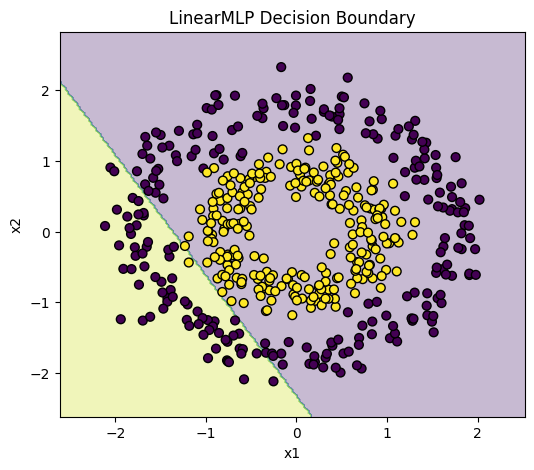

Результат работы модели NonlinearMLP (с активациями):


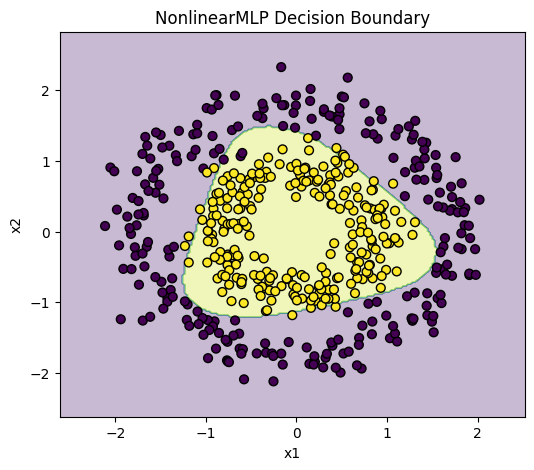

In [ ]:
# %% [markdown]
"""
## Визуализация разделяющей границы (decision boundary)

Ниже представлена функция, которая:
- Создаёт равномерную сетку точек по области данных.
- Пропускает её через обученную модель (используя финальный выход out2).
- Получает предсказанный класс для каждой точки.
- Отрисовывает контурную заливку (разделяющую границу) и исходные данные.

Мы затем вызываем эту функцию для модели LinearMLP (без активаций) и для NonlinearMLP (с активациями).
"""

# %% [code]
def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    # Определим пределы для сетки
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # Создадим сетку
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_tensor = torch.FloatTensor(grid)

    model.eval()
    with torch.no_grad():
        # Получаем финальный выход (out2)
        _, out2 = model(grid_tensor)
        # Предсказанный класс (индекс максимального логита)
        _, predicted = torch.max(out2, 1)
    Z = predicted.numpy().reshape(xx.shape)

    plt.figure(figsize=(6,5))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=40)
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

# %% [markdown]
"""
## Визуализация итоговой разделяющей границы для обученных моделей

Мы вызываем функцию `plot_decision_boundary` для каждой модели.
"""

# %% [code]
print("Результат работы модели LinearMLP (без активаций):")
plot_decision_boundary(linear_model, X, y, title="LinearMLP Decision Boundary")

print("Результат работы модели NonlinearMLP (с активациями):")
plot_decision_boundary(nonlinear_model, X, y, title="NonlinearMLP Decision Boundary")


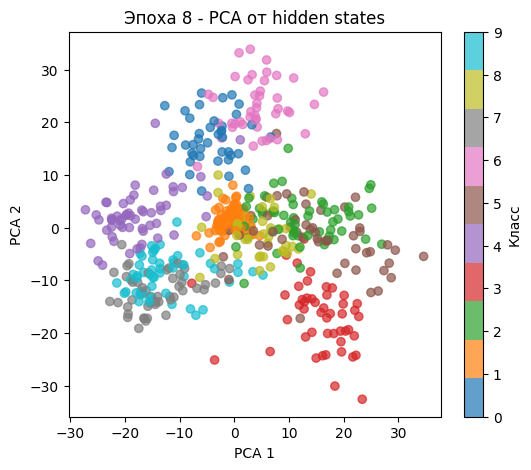

KeyboardInterrupt: 

In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import torchvision
# import torchvision.transforms as transforms
# from torch.utils.data import DataLoader
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.decomposition import PCA
# from IPython.display import clear_output
# import time

# # Определяем устройство
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print("Устройство:", device)

# # Преобразования: MNIST (ToTensor + Normalize)
# transform = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize((0.1307,), (0.3081,))
# ])

# # Загрузка MNIST
# train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
# test_dataset  = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# batch_size = 128
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# # Определим MLP-модель, которая возвращает логиты и скрытые представления (эмбеддинги)
# class MLP(nn.Module):
#     def __init__(self):
#         super(MLP, self).__init__()
#         self.flatten = nn.Flatten()
#         self.fc1 = nn.Linear(28*28, 256)
#         self.relu1 = nn.ReLU()
#         self.fc2 = nn.Linear(256, 128)  # скрытый слой для эмбеддингов
#         self.relu2 = nn.ReLU()
#         self.fc3 = nn.Linear(128, 10)   # выходной слой для 10 классов

#     def forward(self, x):
#         x = self.flatten(x)
#         x = self.relu1(self.fc1(x))
#         hidden = self.relu2(self.fc2(x))  # эмбеддинги
#         out = self.fc3(hidden)
#         return out, hidden

# model = MLP().to(device)
# print(model)

# # Функция потерь и оптимизатор
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# num_epochs = 10

# # Для визуализации эмбеддингов возьмем подмножество тестового набора (например, первые 500 изображений)
# # Собираем их в один батч
# embeddings_X = []
# embeddings_y = []
# for i, (images, labels) in enumerate(test_loader):
#     embeddings_X.append(images)
#     embeddings_y.append(labels)
#     if i >= 3:  # примерно 500-600 примеров
#         break
# embeddings_X = torch.cat(embeddings_X, dim=0).to(device)
# embeddings_y = torch.cat(embeddings_y, dim=0).cpu().numpy()

# # Обучающий цикл с визуализацией эмбеддингов на каждой эпохе
# for epoch in range(num_epochs):
#     model.train()
#     running_loss = 0.0
#     for inputs, targets in train_loader:
#         inputs, targets = inputs.to(device), targets.to(device)
#         optimizer.zero_grad()
#         outputs, _ = model(inputs)
#         loss = criterion(outputs, targets)
#         loss.backward()
#         optimizer.step()
#         running_loss += loss.item()
#     avg_loss = running_loss / len(train_loader)
#     print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")

#     # Визуализация скрытых представлений (эмбеддингов) на подмножестве тестовых данных
#     model.eval()
#     with torch.no_grad():
#         _, hidden = model(embeddings_X)
#     hidden = hidden.cpu().numpy()

#     # Снижаем размерность с помощью PCA до 2D для наглядной визуализации
#     pca = PCA(n_components=2)
#     hidden_2d = pca.fit_transform(hidden)

#     clear_output(wait=True)
#     plt.figure(figsize=(6,5))
#     scatter = plt.scatter(hidden_2d[:, 0], hidden_2d[:, 1], c=embeddings_y, cmap='tab10', alpha=0.7)
#     plt.title(f"Эпоха {epoch+1} - PCA от hidden states")
#     plt.xlabel("PCA 1")
#     plt.ylabel("PCA 2")
#     plt.colorbar(scatter, label="Класс")
#     plt.show()
#     time.sleep(0.5)

# # После обучения можно также замерить точность модели
# model.eval()
# correct = 0
# total = 0
# with torch.no_grad():
#     for inputs, targets in test_loader:
#         inputs, targets = inputs.to(device), targets.to(device)
#         outputs, _ = model(inputs)
#         _, predicted = torch.max(outputs, 1)
#         total += targets.size(0)
#         correct += (predicted == targets).sum().item()
# print(f"Test Accuracy: {100 * correct / total:.2f}%")


Используем устройство: cuda
Optimizer: SGD, Epoch 1/5, Loss: 1.6374
Optimizer: SGD, Epoch 2/5, Loss: 0.8563
Optimizer: SGD, Epoch 3/5, Loss: 0.6047
Optimizer: SGD, Epoch 4/5, Loss: 0.4964
Optimizer: SGD, Epoch 5/5, Loss: 0.4432
Optimizer: SGD_momentum, Epoch 1/5, Loss: 0.7720
Optimizer: SGD_momentum, Epoch 2/5, Loss: 0.3109
Optimizer: SGD_momentum, Epoch 3/5, Loss: 0.2494
Optimizer: SGD_momentum, Epoch 4/5, Loss: 0.2094
Optimizer: SGD_momentum, Epoch 5/5, Loss: 0.1818
Optimizer: Adam, Epoch 1/5, Loss: 0.4613
Optimizer: Adam, Epoch 2/5, Loss: 0.1809
Optimizer: Adam, Epoch 3/5, Loss: 0.1249
Optimizer: Adam, Epoch 4/5, Loss: 0.1016
Optimizer: Adam, Epoch 5/5, Loss: 0.0929
Optimizer: RMSprop, Epoch 1/5, Loss: 7.6740
Optimizer: RMSprop, Epoch 2/5, Loss: 0.2902
Optimizer: RMSprop, Epoch 3/5, Loss: 0.1828
Optimizer: RMSprop, Epoch 4/5, Loss: 0.1504
Optimizer: RMSprop, Epoch 5/5, Loss: 0.1703


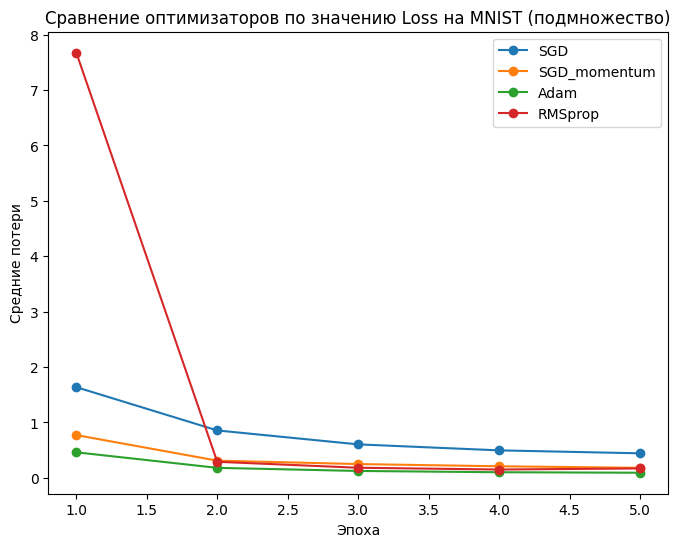

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Subset
import matplotlib.pyplot as plt
import numpy as np

# Устанавливаем seed для воспроизводимости
torch.manual_seed(42)
np.random.seed(42)

# Определяем устройство (GPU, если доступно)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Используем устройство:", device)

# Преобразования для MNIST: преобразуем в тензор и нормализуем
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Загружаем датасет MNIST
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
# Для ускорения эксперимента используем подмножество, например, первые 10,000 примеров
subset_indices = list(range(10000))
train_subset = Subset(train_dataset, subset_indices)
batch_size = 128
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)

# Определяем простую MLP модель для MNIST
class SimpleMLP(nn.Module):
    def __init__(self):
        super(SimpleMLP, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 256)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Функция обучения модели с заданным оптимизатором
def train_model(optimizer_name, num_epochs=5, lr=0.01):
    # Создаем новую модель с одинаковой инициализацией
    model = SimpleMLP().to(device)
    criterion = nn.CrossEntropyLoss()

    # Выбираем оптимизатор по имени
    if optimizer_name == "SGD":
        optimizer = optim.SGD(model.parameters(), lr=lr)
    elif optimizer_name == "SGD_momentum":
        optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
    elif optimizer_name == "Adam":
        optimizer = optim.Adam(model.parameters(), lr=lr)
    elif optimizer_name == "RMSprop":
        optimizer = optim.RMSprop(model.parameters(), lr=lr)
    else:
        raise ValueError("Неизвестный оптимизатор!")

    loss_history = []

    # Обучающий цикл
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()           # обнуляем градиенты
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()                 # обратное распространение ошибки
            optimizer.step()                # обновление параметров
            running_loss += loss.item()
        avg_loss = running_loss / len(train_loader)
        loss_history.append(avg_loss)
        print(f"Optimizer: {optimizer_name}, Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")
    return loss_history

# Список оптимизаторов для сравнения
optimizers_to_test = ["SGD", "SGD_momentum", "Adam", "RMSprop"]
results = {}

for opt_name in optimizers_to_test:
    results[opt_name] = train_model(opt_name, num_epochs=5, lr=0.01)

# Визуализируем кривые обучения (loss) для всех оптимизаторов
plt.figure(figsize=(8,6))
for opt_name, losses in results.items():
    plt.plot(range(1, len(losses)+1), losses, marker='o', label=opt_name)
plt.xlabel("Эпоха")
plt.ylabel("Средние потери")
plt.title("Сравнение оптимизаторов по значению Loss на MNIST (подмножество)")
plt.legend()
plt.show()
